In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

%matplotlib inline

# Study of Transparent Boundary Conditions for the KdV equation

As presented by [Halpern, 1986] for the linearized Navier-Stokes equation, we will obtain here the expression for the Transparent Boundary Conditions for the linearized 1D KdV equation

\begin{equation}
\label{eq:kdv}
Lu = 0
\end{equation}


where

$L = \frac{\partial}{\partial t} + a\frac{\partial}{\partial x} + \frac{\partial}{\partial x^3}, \ \ a \in \mathbb{R}  $

For every $x \ge 0$, we consider the Laplace transform of $u$ in $t$ :

\begin{equation}
\label{eq:laplaceTransform}
\hat{u}(x,\omega) = \int_0^\infty{u(x,t)e^{-i\omega t}dt}, \ \ \sigma,\omega \in \mathbb{R}
\end{equation}

Writing the inverse Laplace transform and replacing in (\ref{eq:kdv}), one gets that $\hat{u}$ satisfies the ODE

\begin{equation}
\label{eq:ODEhat}
i\omega \hat{u} + a \hat{u}_x + \hat{u}_{xxx} = 0
\end{equation}

whose solution has the form 

\begin{equation}
\label{eq:solutionODEhat}
\hat{u}(x,\omega) = \alpha_1(\omega)e^{\lambda_1(\omega)x} + \alpha_2(\omega)e^{\lambda_2(\omega)x} + \alpha_3(x,\omega)e^{\lambda_3(\omega)x}
\end{equation}

$\lambda_i, i=1,2,3$ are solution of the characteristic equation

\begin{equation}
\label{eq:charEq}
i\omega + a\lambda + \lambda^3 = 0
\end{equation}

The solutions of (\ref{eq:charEq}) are

\begin{equation}
\label{eq:lambdas}
\lambda_1 = \frac{\theta}{\sqrt[3]{18}} - \frac{a\sqrt[3]{\frac{2}{3}}}{\theta} \\
\lambda_2 = \frac{(1+i\sqrt{3})a}{\theta \sqrt[3]{12}} - \frac{(1-i\sqrt{3})\theta}{2\sqrt[3]{18}} \\
\lambda_3 = \frac{(1-i\sqrt{3})a}{\theta \sqrt[3]{12}} - \frac{(1+i\sqrt{3})\theta}{2\sqrt[3]{18}}
\end{equation}

with

$\theta = \sqrt[3]{D\sqrt{3} - 9i\omega}$

$D = 4a^3 - 27\omega^2$



The solution (\ref{eq:solutionODEhat}) must vanish as $x \rightarrow 0$. Therefore, it must contain only the terms $\alpha_ie^{\lambda_ix}$ with $Re(\lambda_i) < 0$. In order to compute the real part of the solutions of the characteristic equations, we will write the complex number $D$ in the exponential form

$D = \rho e^{i\beta},  \ \ \rho>0$

and thus $\lambda_i$ can be rewritten as 

\begin{equation}
\lambda_1 = \frac{\rho e^{i\beta}}{\sqrt[3]{18}} - \frac{a\sqrt[3]{\frac{2}{3}} e^{-i\beta}}{\rho} \\
\lambda_2 = \frac{(1+i\sqrt{3})a e^{-i\beta}}{\rho \sqrt[3]{12}} - \frac{(1-i\sqrt{3})\rho e^{i\beta}}{2\sqrt[3]{18}} \\
\lambda_3 = \frac{(1-i\sqrt{3})a e^{-i\beta}}{\rho \sqrt[3]{12}} - \frac{(1+i\sqrt{3})\rho e^{i\beta}}{2\sqrt[3]{18}}
\end{equation}

so

\begin{equation}
\rho Re(\lambda_1) = \frac{\rho^2}{\sqrt[3]{18}} cos\beta - a\sqrt[3]{\frac{2}{3}}cos\beta = \frac{1}{\sqrt[3]{18}} \left( \rho^2  -a\sqrt[3]{12} \right)cos\beta \\
\rho Re(\lambda_2) = \frac{a}{\sqrt[3]{12}}cos\beta +  \frac{a\sqrt{3}}{\sqrt[3]{12}}sin\beta - \frac{\rho^2}{2\sqrt[3]{18}}cos\beta - \frac{\rho^2\sqrt{3}}{2\sqrt[3]{18}}sin\beta = -\frac{1}{2\sqrt[3]{18}} \left( \rho^2  -a\sqrt[3]{12} \right) (cos\beta + \sqrt{3}sin\beta) \\
\rho Re(\lambda_3) = \frac{a}{\sqrt[3]{12}}cos\beta -  \frac{a\sqrt{3}}{\sqrt[3]{12}}sin\beta - \frac{\rho^2}{2\sqrt[3]{18}}cos\beta + \frac{\rho^2\sqrt{3}}{2\sqrt[3]{18}}sin\beta = -\frac{1}{2\sqrt[3]{18}}\left( \rho^2  -a\sqrt[3]{12} \right) (cos\beta - \sqrt{3}sin\beta)
\end{equation}

## First case : $a<0$ 

We will firstly analyze the case $a \le 0$. This case is simple because $\rho^2  -a\sqrt[3]{12} > 0 $, so the sign of $Re(\lambda_1), Re(\lambda_2)$  and $Re(\lambda_3)$ are the same of $\gamma_1 = cos\beta$, $\gamma_2 = -(cos\beta + \sqrt{3}sin\beta)$ and $\gamma_3 = -(cos\beta - \sqrt{3}sin\beta)$ respectively.

The values of $\gamma_1$, $\gamma_2$ and $\gamma_3$ for different values of $a \le 0$ and $\omega \in \mathbb{R}$. For this purpose, we will compute $\tilde{\rho}e^{i\tilde{\beta}} = D\sqrt{3} - 9i\omega = \theta^3 = \left(\rho e^{i\beta} \right)^3$ thus $\beta = \frac{\tilde{\beta}}{3}$.

In [2]:
def getBeta(a,omega):
    D = 4.*a*a*a - 27.*omega*omega
    Z = np.sqrt(3)*D - 9*1.j*omega
    beta = np.angle(Z)/3.
    
    return beta

In [26]:
def plot3d(x,y,z,xlbl,ylbl,title) :
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(title)
    
    N0 = x.shape[0]
    N1 = x.shape[1]
    G = np.zeros((N0,N1,3))
    
    eps = 1e-9
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    red_legend= mpatches.Patch(color='red', label=r'%s < 0' %(title))
    blue_legend = mpatches.Patch(color='blue', label=r'%s > 0' %(title))
    green_legend = mpatches.Patch(color='green', label=r'%s = 0' %(title))

    red = [1,0,0]
    green = [0,1,0]
    blue = [0,0,1]

    G[z>=eps] = blue
    G[z<=eps] = red
    G[np.absolute(z)<=eps] = green
    
    mapc = plt.imshow(G,interpolation='nearest',extent=[x[0,0],x[-1,-1],y[0,0],y[-1,-1]])
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.title(title)
    plt.legend(handles=[red_legend,green_legend,blue_legend],loc=(1.,.7))

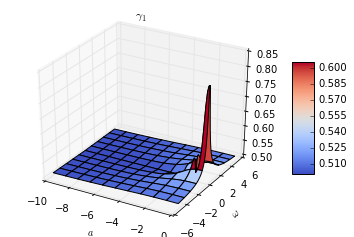

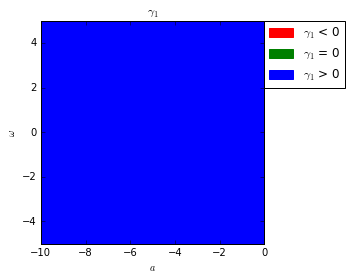

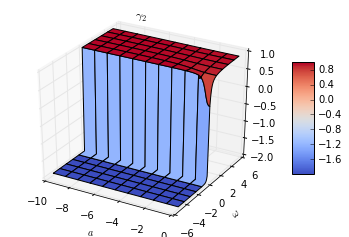

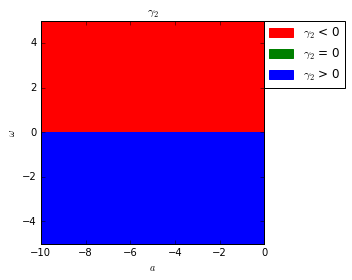

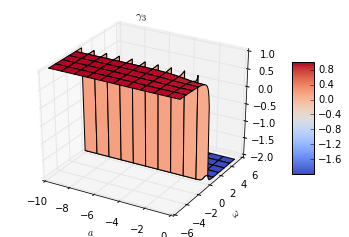

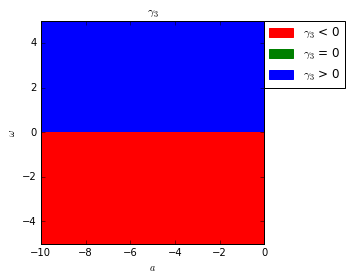

In [28]:
aaa = np.linspace(-10,0,100)
omegas = np.linspace(-5,5,100)

Aaa, Omegas = np.meshgrid(aaa,omegas)

Betas = getBeta(Aaa,Omegas)
cosBetas = np.cos(Betas)
sinBetas = np.sin(Betas)


plot3d(Aaa,Omegas,cosBetas,'$a$','$\omega$','$\gamma_1$')
plot3d(Aaa,Omegas,-(cosBetas+np.sqrt(3)*sinBetas),'$a$','$\omega$','$\gamma_2$')
plot3d(Aaa,Omegas,-(cosBetas-np.sqrt(3)*sinBetas),'$a$','$\omega$','$\gamma_3$')

### Conclusions

The above results indicate that, for $a<0$, only one of the solutions $\gamma_i$ of (\ref{eq:charEq}) have positive real part : in fact, $Re(\lambda_1)$ is always negative; for $\omega < 0$, $Re(\lambda_2) > 0$ and $Re(\lambda_3) < 0$; for $\omega > 0$, $Re(\lambda_2) < 0$ and $Re(\lambda_3) > 0$.

Let $\lambda$ be the only solution with negative real part. The Laplace transform of the solution can be written as 

\begin{equation}
\hat{u}(x,\omega) = \alpha(\omega)e^{\lambda(\omega)x}
\end{equation}

which is solution of

\begin{equation}
\hat{u}_x = \lambda \hat{u}
\end{equation}

Therefore, from the inverse Laplace Transform

\begin{equation}
    \frac{\partial{u}}{{\partial x}}(x,t) = \int_{-\infty}^{\infty}\hat{u}_x(x,\omega)e^{i\omega t}d\omega
\end{equation}

we get the TBC for the boundary $x_0$

\begin{equation}
    \frac{\partial{u}}{{\partial x}}(x_0,t) = \int_{-\infty}^{\infty}\lambda \hat{u}(x_0,\omega)e^{i\omega t}d\omega
\end{equation}

## Generic case

We will analyze in a similar way the sign of the real part of the solutions of (\ref{eq:CharEq}) without restrictions for the value of $a$.

Considering that in the case $a>0$ is not so simple to obtain conclusions about these signs, as we did previously, we will now compute these solutions using (\ref{eq:lambdas}), and plot its real parts in function of $a$ and $\omega$

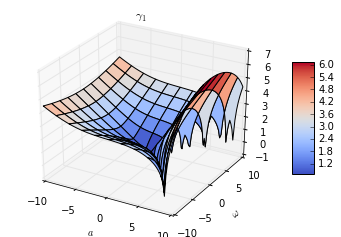

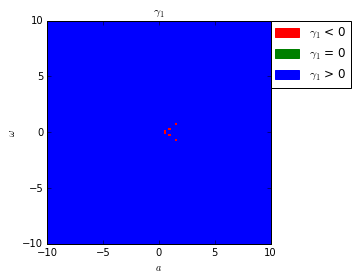

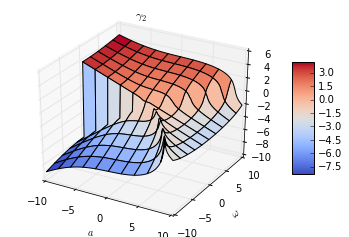

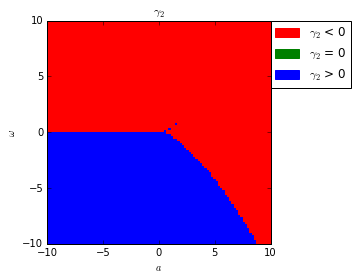

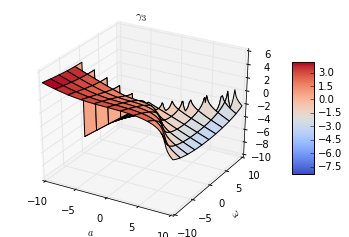

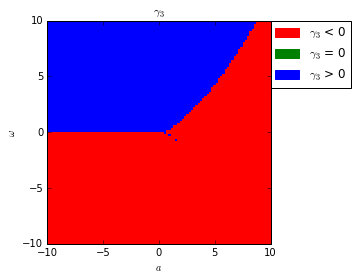

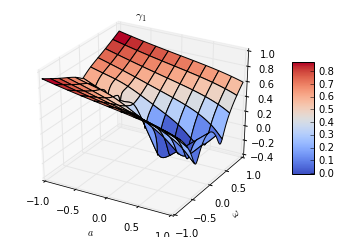

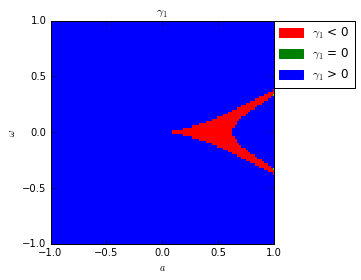

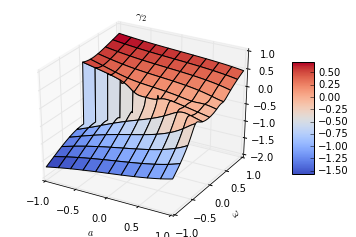

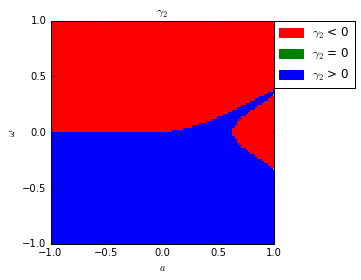

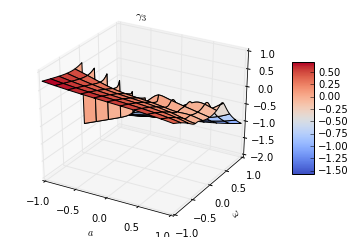

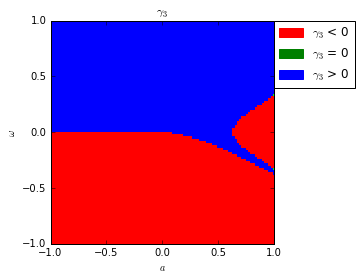

In [30]:
aaa = np.linspace(-10,10,100)
omegas = np.linspace(-10,10,100)

Aaa, Omegas = np.meshgrid(aaa,omegas)

D = 4.*Aaa*Aaa*Aaa - 27.*Omegas*Omegas
Thetas = np.power(D*np.sqrt(3) - 9.*1.j*Omegas,1./3.)
Lamb1 = Thetas/np.power(18.,1./3.) - Aaa*np.power(2./3.,1./3.)/Thetas
Lamb2 = (1.+1.j*np.sqrt(3))*Aaa/(Thetas*np.power(12.,1./3.)) - (1.-1.j*np.sqrt(3))*Thetas/(2*np.power(18.,1./3.)) 
Lamb3 = (1.-1.j*np.sqrt(3))*Aaa/(Thetas*np.power(12.,1./3.)) - (1.+1.j*np.sqrt(3))*Thetas/(2*np.power(18.,1./3.)) 

plot3d(Aaa,Omegas,np.real(Lamb1),'$a$','$\omega$','$\gamma_1$')
plot3d(Aaa,Omegas,np.real(Lamb2),'$a$','$\omega$','$\gamma_2$')
plot3d(Aaa,Omegas,np.real(Lamb3),'$a$','$\omega$','$\gamma_3$')


### MORE REFINED

aaa = np.linspace(-1,1,100)
omegas = np.linspace(-1,1,100)

Aaa, Omegas = np.meshgrid(aaa,omegas)

D = 4.*Aaa*Aaa*Aaa - 27.*Omegas*Omegas
Thetas = np.power(D*np.sqrt(3) - 9.*1.j*Omegas,1./3.)
Lamb1 = Thetas/np.power(18.,1./3.) - Aaa*np.power(2./3.,1./3.)/Thetas
Lamb2 = (1.+1.j*np.sqrt(3))*Aaa/(Thetas*np.power(12.,1./3.)) - (1.-1.j*np.sqrt(3))*Thetas/(2*np.power(18.,1./3.)) 
Lamb3 = (1.-1.j*np.sqrt(3))*Aaa/(Thetas*np.power(12.,1./3.)) - (1.+1.j*np.sqrt(3))*Thetas/(2*np.power(18.,1./3.)) 

plot3d(Aaa,Omegas,np.real(Lamb1),'$a$','$\omega$','$\gamma_1$')
plot3d(Aaa,Omegas,np.real(Lamb2),'$a$','$\omega$','$\gamma_2$')
plot3d(Aaa,Omegas,np.real(Lamb3),'$a$','$\omega$','$\gamma_3$')